<a href="https://colab.research.google.com/github/DavoodSZ1993/Pytorch_Basics/blob/main/pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Some Useful Notes on PyTorch Module

### `torchvision.datasets` Module:

* `datasets.FashionMNIST()`: Fashion-MNIST dataset, consisting of a training set of 60,000 examples and a test set of 10,000 examples. The dataset contains 28x28 grayscale images associated with 10 classes (labels).



In [1]:
from torchvision import datasets
from IPython import display

train_data = datasets.FashionMNIST(root='../data', train=True, download=True)
val_data = datasets.FashionMNIST(root='../data', train=False, download=True)
display.clear_output()

len(train_data), len(val_data), train_data.classes

(60000,
 10000,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

### Side Note: `matplotlib.pyplot.imshow()`: 
This method displays data as an image, i.e., as a 2D regular raster. 

label:  T-shirt/top (0)


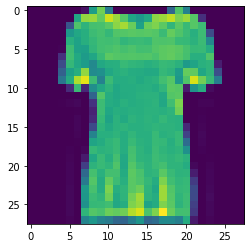

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_img(img, label):
  print('label: ', train_data.classes[label], "("+str(label)+")")
  plt.imshow(img)

show_img(*train_data[10])

### `torchvision.transforms` Module: 

Transforms are common image transformations. 

* `transforms.Compose()`: Composes several transforms together.
* `transforms.Resize()`: Resizes the input image to the given size.
* `transforms.ToTensor()`: Converts a `PIL Image ` or `numpy.ndarray` (H x W x C) to tensor (C x H x W).

In [4]:
from torchvision import transforms

trans = transforms.Compose([transforms.Resize((28, 28)),
                            transforms.ToTensor()])

train_data = datasets.FashionMNIST(root='../data', transform=trans,
                                   train=True, download=True)
val_data = datasets.FashionMNIST(root='../data', transform=trans,
                                 train=False, download=True)
display.clear_output()



### `torch.utils.data.DataLoader()`:

This class represents a Python iterable over a dataset.

In [5]:
from torch.utils.data import DataLoader

train_batch = DataLoader(train_data, batch_size=32, 
                         shuffle=True, num_workers=4)
val_batch = DataLoader(val_data, batch_size=32,
                       shuffle=False, num_workers=4)


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### `torchvision.utils`:
This module contains various utilities, mostly for visualization.

* `torchvision.utils.make_grid()`: make a grid for images.

* `torch.permute()`: Returns a view of the original tensor input with its dimensions permuted.

* `torch.tensor.detach()`: Returns a new tensor, detached from the current graph.

* `torch.tensor()` is designed to be used in the context of gradient descent optimization. These tensors hold a tensor with numneric values (just like `np.ndarray`). In addition, they contain computational graph leading to these values. 

* When converting `torch.tensor` to `np.adarray`, we must explicitly remove the computational graph of the tensor using the `detach()` command.

images.shape:  torch.Size([32, 1, 28, 28])


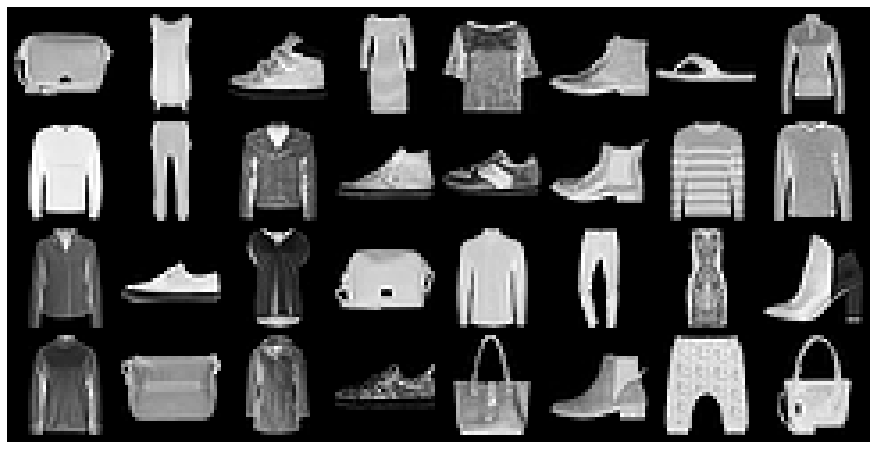

In [6]:
from torchvision.utils import make_grid

for images, _ in train_batch:
  print('images.shape: ', images.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images).permute((1, 2, 0)))
  break

### Side Note: `numpy.squeeze()`:
This method is used to when we want to remove single-dimensional entries from the shape of an array.

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Shape before squeezing:  torch.Size([32, 1, 28, 28])
Shape after squeezing:  torch.Size([32, 28, 28])


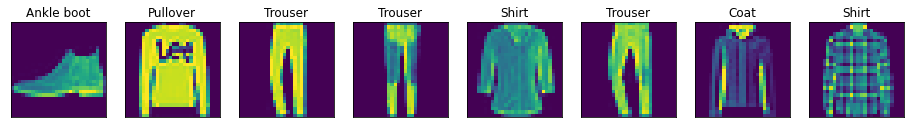

In [25]:
images, labels = next(iter(val_batch))
print('Shape before squeezing: ',images.shape)

images = images.squeeze(1)
print('Shape after squeezing: ',images.shape)

names = []
for label in labels:
  names.append(val_data.classes[label])

figsize = (16, 8)
_,axes = plt.subplots(nrows=1, ncols=8, figsize=figsize)
axes = axes.flatten()
for i, (ax, img, name) in enumerate(zip(axes, images, names)):
  img = img.detach().numpy() 
  ax.imshow(img)

  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)
  ax.set_title(name)